In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('analysis_results.csv')
sizes = df['Size']
times = df['Time(ms)']
log_sizes = np.log(sizes)
log_times = np.log(times)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_sizes, log_times)
log_memory = np.log(df['Memory(KB)'].replace(0, 1))
mem_slope, mem_intercept, mem_r_value, mem_p_value, mem_std_err = stats.linregress(log_sizes, log_memory)
time_C = np.exp(intercept)
mem_C = np.exp(mem_intercept)

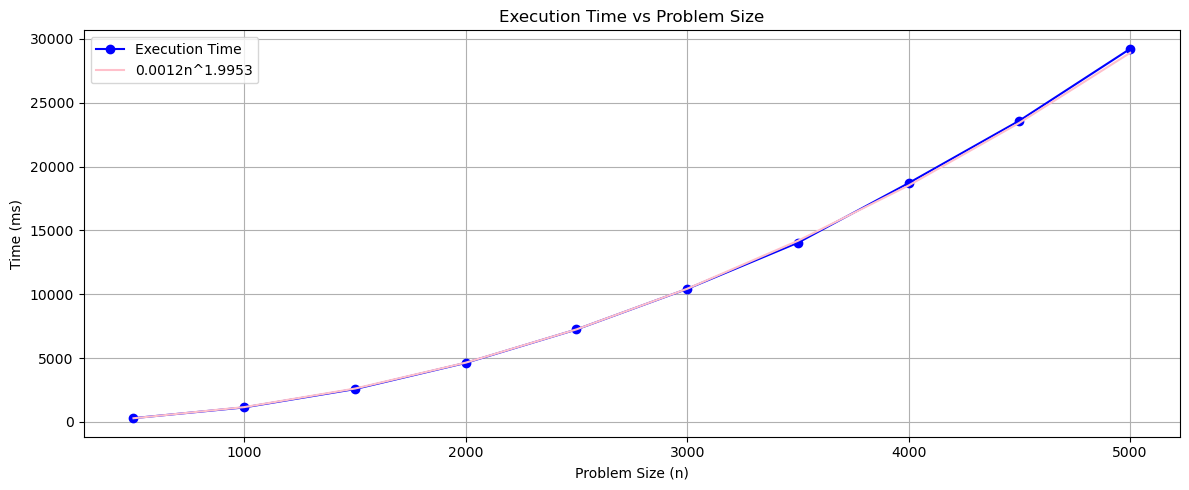

In [8]:
fig1, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(df['Size'], df['Time(ms)'], 'o-', color='blue', label='Execution Time')
ax1.plot(df['Size'], time_C*df['Size']**slope, '-', color='pink', label=f'{time_C:.4f}n^{slope:.4f}')
ax1.set_xlabel('Problem Size (n)')
ax1.set_ylabel('Time (ms)')
ax1.set_title('Execution Time vs Problem Size')
ax1.grid(True)
ax1.legend()
plt.tight_layout()
plt.show()

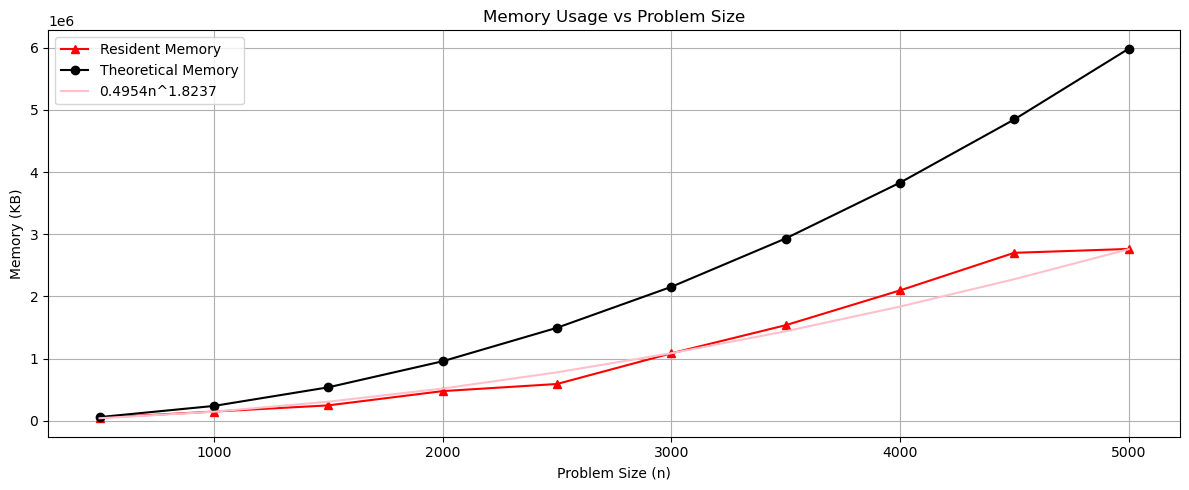

In [9]:
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.plot(df['Size'], df['Memory(KB)'], '^-', color='red', label='Resident Memory')
ax2.plot(df['Size'], df['TheoreticalMemory(KB)'], 'o-', color='black', label='Theoretical Memory')
ax2.plot(df['Size'], mem_C*df['Size']**mem_slope, '-', color='pink', label=f'{mem_C:.4f}n^{mem_slope:.4f}')
ax2.set_xlabel('Problem Size (n)')
ax2.set_ylabel('Memory (KB)')
ax2.set_title('Memory Usage vs Problem Size')
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

In [10]:
print("Problem Size vs Performance Statistics:")
print("-" * 50)
print("Largest problem size tested:", max(df['Size']))
print("Maximum execution time:", f"{max(df['Time(ms)']):.2f} ms")
print("Maximum resident memory usage:", f"{max(df['Memory(KB)']):.2f} KB")
print("-" * 50)
print("Time Complexity Analysis:")
print(f"Slope of log-log plot: {slope:.2f}")
print(f"Estimated time complexity: O(n^{slope:.2f})")
print(f"R-squared value: {r_value**2:.4f}")
print("-" * 50)
print("Space Complexity Analysis:")
print(f"Slope of log-log plot: {mem_slope:.2f}")
print(f"Estimated space complexity: O(n^{mem_slope:.2f})")
print(f"R-squared value: {mem_r_value**2:.4f}")

Problem Size vs Performance Statistics:
--------------------------------------------------
Largest problem size tested: 5000
Maximum execution time: 29216.10 ms
Maximum resident memory usage: 2764096.00 KB
--------------------------------------------------
Time Complexity Analysis:
Slope of log-log plot: 2.00
Estimated time complexity: O(n^2.00)
R-squared value: 0.9999
--------------------------------------------------
Space Complexity Analysis:
Slope of log-log plot: 1.82
Estimated space complexity: O(n^1.82)
R-squared value: 0.9869
